In [1]:
import Pkg
Pkg.activate("../../.")
include("../../LogLoss/RealRealHighDimension.jl")
include("../../Interpolation/ForecastingMainNew.jl");
using JLD2
using DataFrames

  Activating project at `~/Desktop/QuantumInspiredML`


In [2]:
svpath_ns = "../../Data/Van_der_Pol/mps_saves/vdp_ns_d18_chi50.jld2";
dloc =  "../../Data/Van_der_Pol/datasets/vdp_eta_01_c_0.5:4.0_k_0.5:4.0.jld2";

In [139]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)

In [4]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc_ns = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 500 training samples and 100 testing samples.
 - 1 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 18, chi_max = 50

 Created 1 forecastable struct(s) containing class-wise mps and test samples.


In [5]:
mode_range=(-1,1)
xvals=collect(range(mode_range...; step=1E-4))
mode_index=Index(opts_ns.d)
xvals_enc= [get_state(x, opts_ns) for x in xvals]
xvals_enc_it=[ITensor(s, mode_index) for s in xvals_enc];

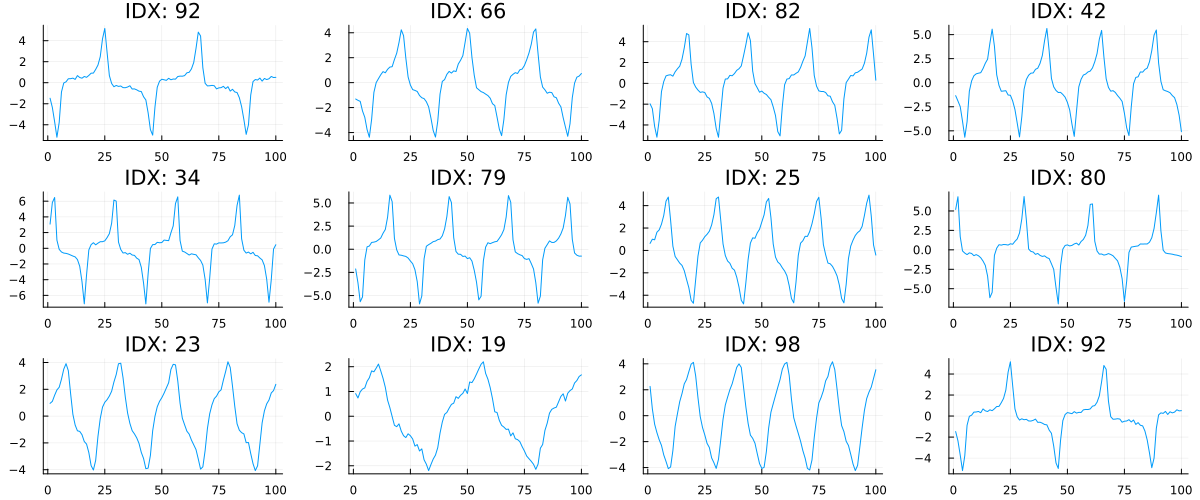

In [149]:
ps = []
for i in 1:12
    pidx = rand(collect(1:size(X_test, 1)))
    p = plot(X_test[pidx, :], label="", title="IDX: $pidx")
    push!(ps, p)
end
plot(ps..., size=(1200, 500))

In [158]:
max_jump=nothing
class = 0
interp_sites = collect(45:65)
instance_idx = 92
stats, p1_ns = any_interpolate_single_timeseries(fc_ns, class, instance_idx, interp_sites, :directMode; 
    NN_baseline=false, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, mode_range=mode_range, 
    xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc, xvals_enc_it=xvals_enc_it, max_jump=max_jump);

(i, x_prev, mx) = (1, -0.37537325692255175, -0.3776)
(i, x_prev, mx) = (2, -0.3776, -0.4318)
(i, x_prev, mx) = (3, -0.4318, -0.4533)
(i, x_prev, mx) = (4, -0.4533, -0.2871)
(i, x_prev, mx) = (5, -0.2871, -0.1065)
(i, x_prev, mx) = (6, -0.1065, 0.0206)
(i, x_prev, mx) = (7, 0.0206, 0.0438)
(i, x_prev, mx) = (8, 0.0438, 0.0468)
(i, x_prev, mx) = (9, 0.0468, 0.0527)
(i, x_prev, mx) = (10, 0.0527, 0.0577)
(i, x_prev, mx) = (11, 0.0577, 0.0634)
(i, x_prev, mx) = (12, 0.0634, 0.0676)
(i, x_prev, mx) = (13, 0.0676, 0.0754)
(i, x_prev, mx) = (14, 0.0754, 0.087)
(i, x_prev, mx) = (15, 0.087, 0.1036)
(i, x_prev, mx) = (16, 0.1036, 0.1202)
(i, x_prev, mx) = (17, 0.1202, 0.1428)
(i, x_prev, mx) = (18, 0.1428, 0.1817)
(i, x_prev, mx) = (19, 0.1817, 0.2412)
(i, x_prev, mx) = (20, 0.2412, 0.3214)
(i, x_prev, mx) = (21, 0.3214, 0.5015)


╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│    MAE │ 0.470615 │
╰────────┴──────────╯


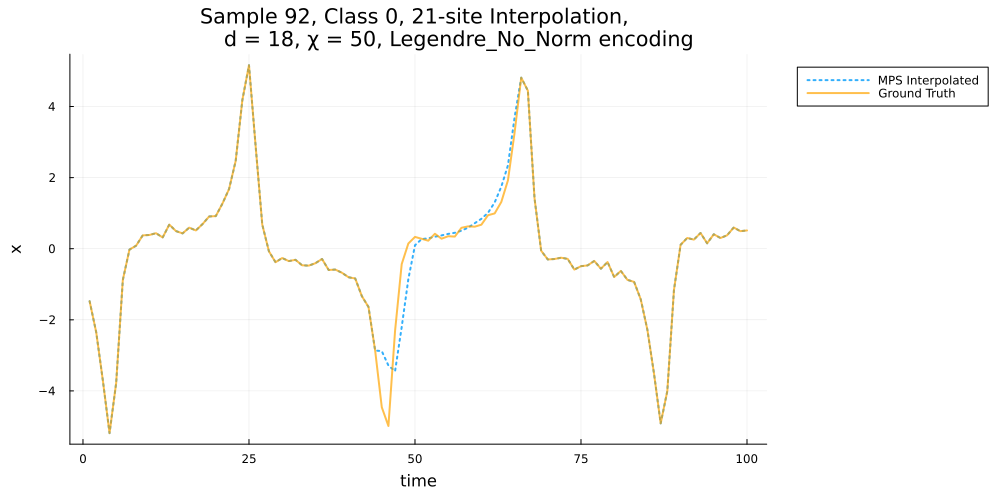

In [159]:
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)
#savefig("/Users/joshua/Desktop/QTNML_Stuff/VdP_interp/vdP_s96_nn.svg")